### Classification of Fashion Clothing Images using Tensorflow

In [30]:
import tensorflow as tf

# check the version of tensorflow
tf.__version__

'2.1.0'

In [31]:
# load the dataset
mnist_fashion_data = tf.keras.datasets.fashion_mnist

# split the data into training and testing
(x_train, y_train), (x_test, y_test) = mnist_fashion_data.load_data()

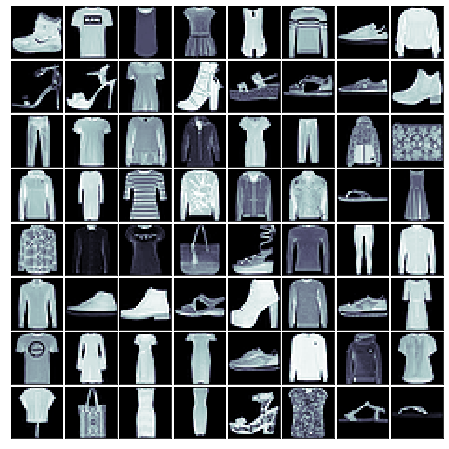

In [32]:
# Visualize the data to look at variety of images
import matplotlib.pyplot as plt

#Setup a figure 6 inches by 6 inches
fig = plt.figure(figsize=(6,6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the faces, each image is 64 by 64 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
    ax.imshow(x_train[i], cmap=plt.cm.bone, interpolation='nearest')
    
plt.show()

In [33]:
# build the model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [34]:
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [35]:
model.fit(x_train, y_train, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 40us/sample - loss: 2.3073 - accuracy: 0.7477
Epoch 2/10
60000/60000 [==============================] - 2s 38us/sample - loss: 0.6492 - accuracy: 0.7921
Epoch 3/10
60000/60000 [==============================] - 2s 38us/sample - loss: 0.5755 - accuracy: 0.8055
Epoch 4/10
60000/60000 [==============================] - 2s 39us/sample - loss: 0.5249 - accuracy: 0.8207
Epoch 5/10
60000/60000 [==============================] - 2s 38us/sample - loss: 0.4825 - accuracy: 0.8317
Epoch 6/10
60000/60000 [==============================] - 2s 37us/sample - loss: 0.4391 - accuracy: 0.8433
Epoch 7/10
60000/60000 [==============================] - 2s 40us/sample - loss: 0.4100 - accuracy: 0.8529
Epoch 8/10
60000/60000 [==============================] - 2s 39us/sample - loss: 0.3987 - accuracy: 0.8557
Epoch 9/10
60000/60000 [==============================] - 2s 41us/sample - loss: 0.3889 - accuracy: 0.8598
Epoch 10/10
60

In [36]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          multiple                  0         
_________________________________________________________________
dense_5 (Dense)              multiple                  100480    
_________________________________________________________________
dense_6 (Dense)              multiple                  16512     
_________________________________________________________________
dense_7 (Dense)              multiple                  1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [37]:
# evaluate the model
model_loss, model_accu = model.evaluate(x_test, y_test)
print(model_loss, model_accu)

10000/10000 [==============================] - 0s 25us/sample - loss: 0.4343 - accuracy: 0.8423
0.4343017106771469 0.8423


In [38]:
# predict on test data
predictions = model.predict(x_test)
predictions

array([[7.9142873e-12, 2.2536117e-11, 4.4696538e-10, ..., 4.8425194e-02,
        1.1638991e-10, 9.3128300e-01],
       [8.1893505e-04, 1.3415133e-06, 9.3080825e-01, ..., 7.3870046e-19,
        5.8916332e-05, 1.2918182e-12],
       [8.0804583e-08, 9.9999988e-01, 2.7766803e-10, ..., 0.0000000e+00,
        1.2936317e-08, 1.4177251e-35],
       ...,
       [4.9795629e-04, 3.8333979e-05, 2.4352425e-03, ..., 3.2814626e-07,
        9.6027225e-01, 9.0512503e-06],
       [7.2488591e-12, 1.0000000e+00, 4.5395888e-15, ..., 7.5003812e-37,
        1.7190809e-08, 1.1362985e-32],
       [1.6638864e-02, 2.0848047e-03, 1.4509187e-03, ..., 1.3841319e-01,
        6.2321614e-02, 5.1295657e-02]], dtype=float32)

In [39]:
import numpy as np

np.argmax(predictions[0])

9

In [40]:
y_test[0]

9

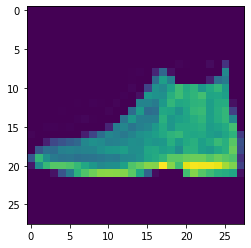

In [41]:
plt.imshow(x_test[0])

In [42]:
# save the model
model.save('models/mnist_fashion_model')

INFO:tensorflow:Assets written to: models/mnist_fashion_model/assets
